In [90]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score


In [91]:
iris_df = pd.read_csv('iris.csv')

iris_df.info()

# Examinar os primeiros registros para entender a estrutura dos dados
print(iris_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [92]:
# Dividir os dados em conjuntos de treinamento e teste
X = iris_df.drop('species', axis=1)  # Features
y = iris_df['species']  # Alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Tamanho do conjunto de treinamento:", X_train.shape[0])
print("Tamanho do conjunto de teste:", X_test.shape[0])

Tamanho do conjunto de treinamento: 105
Tamanho do conjunto de teste: 45


In [93]:
scaler = StandardScaler()

X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

print("Dados de características normalizados:")
print(X_train_normalized)

Dados de características normalizados:
[[-0.4134164  -1.46440146 -0.10014569 -0.32149987]
 [ 0.55122187 -0.49582097  0.71771076  0.35364985]
 [ 0.67180165  0.2306144   0.95138404  0.75873969]
 [ 0.91296121 -0.01153072  0.30878254  0.21861991]
 [ 1.63643991  1.44134002  1.30189395  1.7039493 ]
 [-0.17225683 -0.25367584  0.1919459   0.08358997]
 [ 2.11875905 -0.01153072  1.59398554  1.16382952]
 [-0.29283662 -0.01153072  0.36720086  0.35364985]
 [-0.89573553  1.19919489 -1.443767   -1.40173942]
 [ 2.23933883 -0.49582097  1.65240385  1.02879957]
 [-0.05167705 -0.73796609  0.13352758 -0.32149987]
 [-0.77515575  0.95704977 -1.443767   -1.40173942]
 [-1.01631531  1.19919489 -1.50218532 -1.26670948]
 [-0.89573553  1.92563026 -1.15167541 -1.13167953]
 [-1.01631531 -2.43298195 -0.21698232 -0.32149987]
 [ 0.55122187 -0.73796609  0.60087413  0.75873969]
 [-1.25747488  0.95704977 -1.15167541 -1.40173942]
 [-1.01631531 -0.01153072 -1.32693037 -1.40173942]
 [-0.89573553  0.71490465 -1.26851205 -0.99

In [94]:
X_train_unnormalized = X_train
X_test_unnormalized = X_test

print("Dados de características sem normalização:")
print(X_train_unnormalized)

Dados de características sem normalização:
     sepal_length  sepal_width  petal_length  petal_width
81            5.5          2.4           3.7          1.0
133           6.3          2.8           5.1          1.5
137           6.4          3.1           5.5          1.8
75            6.6          3.0           4.4          1.4
109           7.2          3.6           6.1          2.5
..            ...          ...           ...          ...
71            6.1          2.8           4.0          1.3
106           4.9          2.5           4.5          1.7
14            5.8          4.0           1.2          0.2
92            5.8          2.6           4.0          1.2
102           7.1          3.0           5.9          2.1

[105 rows x 4 columns]


In [95]:
modelo = LogisticRegression()

modelo.fit(X_train, y_train)

previsoes = modelo.predict(X_test)

acuracia = accuracy_score(y_test, previsoes)

print("Acurácia do modelo de Regressão Logística:", acuracia)

Acurácia do modelo de Regressão Logística: 1.0


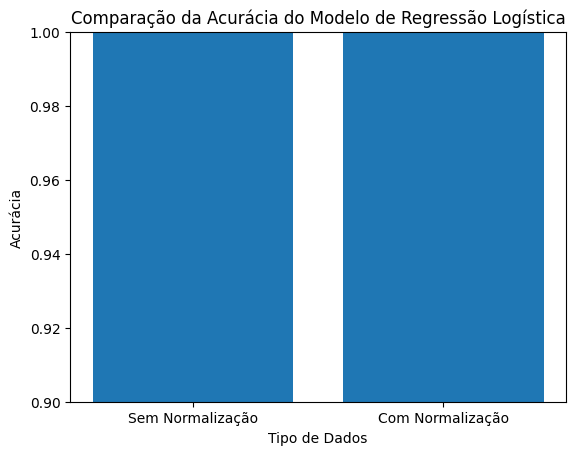

In [96]:
# Instanciar o modelo de Regressão Logística para dados não normalizados
modelo_sem_normalizacao = LogisticRegression()
# Treinar o modelo com o conjunto de dados de treinamento não normalizado
modelo_sem_normalizacao.fit(X_train, y_train)
# Fazer previsões sobre o conjunto de dados de teste não normalizado
previsoes_sem_normalizacao = modelo_sem_normalizacao.predict(X_test)
# Calcular a acurácia do modelo não normalizado
acuracia_sem_normalizacao = accuracy_score(y_test, previsoes_sem_normalizacao)

# Instanciar o modelo de Regressão Logística para dados normalizados
modelo_com_normalizacao = LogisticRegression()
# Inicializar o scaler
scaler = StandardScaler()
# Ajustar o scaler aos dados de treinamento e transformar os dados de treinamento
X_train_normalized = scaler.fit_transform(X_train)
# Transformar os dados de teste
X_test_normalized = scaler.transform(X_test)
# Treinar o modelo com o conjunto de dados de treinamento normalizado
modelo_com_normalizacao.fit(X_train_normalized, y_train)
# Fazer previsões sobre o conjunto de dados de teste normalizado
previsoes_com_normalizacao = modelo_com_normalizacao.predict(X_test_normalized)
# Calcular a acurácia do modelo normalizado
acuracia_com_normalizacao = accuracy_score(y_test, previsoes_com_normalizacao)

# Gerar o gráfico de barras comparando as acurácias
plt.bar(['Sem Normalização', 'Com Normalização'], [acuracia_sem_normalizacao, acuracia_com_normalizacao])
plt.xlabel('Tipo de Dados')
plt.ylabel('Acurácia')
plt.title('Comparação da Acurácia do Modelo de Regressão Logística')
plt.ylim(0.9, 1.0)  # Definir o intervalo do eixo y para melhor visualização
plt.show()

In [97]:
modelo = LogisticRegression()

# Realizar a validação cruzada com 5 folds
scores = cross_val_score(modelo, X_train, y_train, cv=5)

# Calcular a média dos scores
media_score = scores.mean()

print("Scores da validação cruzada:", scores)
print("Média dos scores:", media_score)

Scores da validação cruzada: [0.95238095 0.9047619  1.         0.95238095 1.        ]
Média dos scores: 0.9619047619047618
